# 4 李鲁鲁老师的Python课程 基础数据结构

In [9]:
# 首先，我将读取上传的CSV文件，并将标题和内容合并为指定的格式，然后将它们存储在一个列表中。

import csv

# 初始化一个空列表来存储合并后的数据
merged_poems = []

# 读取CSV文件
with open('data/李白.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # 合并标题和内容
        merged_str = f"{row['Title']}::{row['Content']}"
        # 将合并后的字符串添加到列表中
        merged_poems.append(merged_str)

# 显示列表的前几个元素以验证
print(merged_poems[:5])
print(merged_poems[1])
# print the type of merged_poems
print(type(merged_poems))


['宿𫚥湖::鸡鸣发黄山，暝投𫚥湖宿。白雨暎寒山，森森似银竹。提携采铅客，结荷水边沐。半夜四天开，星河烂人目。明晨大楼去，冈陇多屈伏。当与持斧翁，前溪伐云木。', '送别得书字::水色南天远，舟行若在虚。迁人发佳兴，吾子访闲居。日落看归鸟，潭澄羡跃鱼。圣朝思贾谊，应降紫泥书。', '荅湖州迦叶司马问白是何人::青莲居士谪仙人，酒肆藏名三十春。湖州司马何须问，金粟如来是后身。', '长门怨二首 一::天回北斗挂西楼，金屋无人萤火流。月光欲到长门殿，别作深宫一段愁。', '送纪秀才游越::海水不满眼，观涛难称心。即知蓬莱石，却是巨鳌簪。送尔游华顶，令余发舃吟。仙人居射的，道士住山阴。禹穴寻溪入，云门隔岭深。绿萝秋月夜，相忆在鸣琴。']
送别得书字::水色南天远，舟行若在虚。迁人发佳兴，吾子访闲居。日落看归鸟，潭澄羡跃鱼。圣朝思贾谊，应降紫泥书。
<class 'list'>


1168


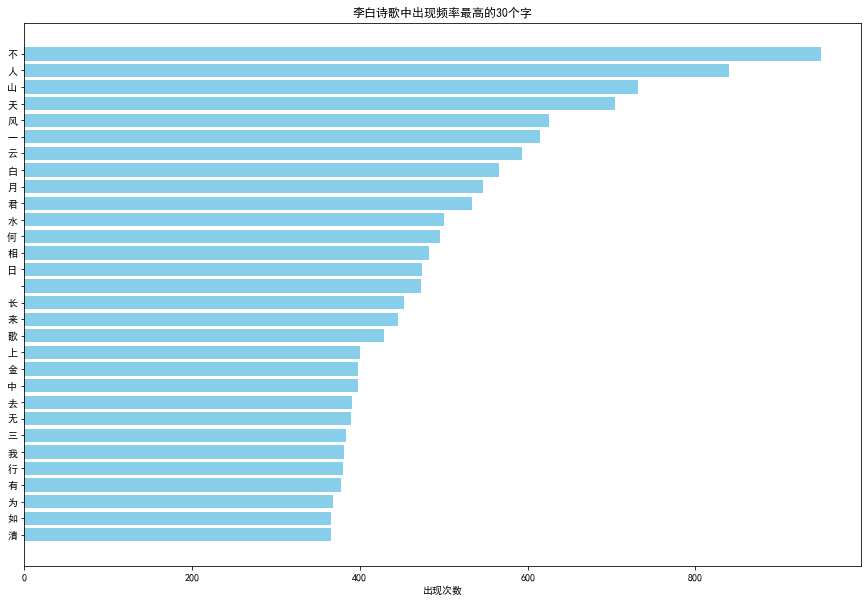

In [12]:
import re
from collections import Counter
import matplotlib.pyplot as plt

print(len(merged_poems))

# 示例数据，假设merged_poems是以下内容
# merged_poems = [
#     "床前明月光，疑是地上霜。",
#     "举头望明月，低头思故乡。",
#     "白发三千丈，缘愁似个长。",
#     "不知明镜里，何日enna再染霜。"
# ]

# 将所有诗歌合并成一个字符串，并去除标点符号
all_poems = "".join(merged_poems)
cleaned_poems = re.sub(r'[，。：:]', '', all_poems)

# 统计每个字的出现频率
word_counts = Counter(cleaned_poems)

# 获取出现频率最高的30个字
top_30_words = word_counts.most_common(30)

# 准备数据用于绘图
words, counts = zip(*top_30_words)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

# 绘制条形图
plt.figure(figsize=(15, 10))
plt.barh(words, counts, color='skyblue')
plt.xlabel('出现次数')
plt.title('李白诗歌中出现频率最高的30个字')
plt.gca().invert_yaxis()  # 反转y轴，使得条形图从上到下排序
plt.show()


In [32]:
import pandas as pd

# Load the Excel file
file_path = 'data/英雄分类.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Extract the required columns
physical_attack = df['物理攻击'].astype(float).tolist()
physical_defense = df['物理防御'].astype(float).tolist()
magic_defense = df['法术防御'].astype(float).tolist()

# Calculate the harmonic mean of physical and magic defense
harmonic_mean_defense = [2 / (1/phy + 1/mag) for phy, mag in zip(physical_defense, magic_defense)]

# Extract hero names for hover text
hero_names = df['名字'].tolist()

# Importing plotly for visualization
import plotly.express as px

# Creating a scatter plot
fig = px.scatter(x=physical_attack, y=harmonic_mean_defense,
                 hover_data=[hero_names], labels={"hover_data": "英雄名"},
                 title="物理攻击与物理/法术防御调和平均数的关系")

# Show plot
fig.show()


In [14]:
print(top_30_words)
print(type(top_30_words))

[('不', 950), ('人', 840), ('山', 731), ('天', 704), ('风', 625), ('一', 615), ('云', 593), ('白', 566), ('月', 547), ('君', 534), ('水', 500), ('何', 495), ('相', 483), ('日', 474), (' ', 473), ('长', 453), ('来', 446), ('歌', 429), ('上', 400), ('金', 398), ('中', 398), ('去', 391), ('无', 389), ('三', 384), ('我', 381), ('行', 380), ('有', 377), ('为', 368), ('如', 366), ('清', 366)]
<class 'list'>


In [4]:
poem_1 = "静夜思::"
poem_2 = "...."

poems = merged_poems

In [6]:
print(len(poems))
print(poems[0])

1168
宿𫚥湖::鸡鸣发黄山，暝投𫚥湖宿。白雨暎寒山，森森似银竹。提携采铅客，结荷水边沐。半夜四天开，星河烂人目。明晨大楼去，冈陇多屈伏。当与持斧翁，前溪伐云木。


In [18]:
def search_character(character, merged_poems):
    # 存储包含特定字符的诗歌
    poems_with_character = []

    # 遍历所有诗歌
    for poem in merged_poems:
        # 如果字符在诗歌中，则添加到列表中
        if character in poem:
            poems_with_character.append(poem)

    return poems_with_character

# 测试函数
# 假设merged_poems是一个包含几首诗的列表
merged_poems_test = [
    "床前明月光，疑是地上霜。",
    "举头望明月，低头思故乡。",
    "君自故乡来，应知故乡事。",
    "来日绮窗前，寒梅著花未？"
]

# 搜索字符"明"在哪些诗中出现
result = search_character("明", merged_poems)
print(len(result))


288


In [23]:
def search_sentence(sentence, merged_poems):
    # 将句子拆分成单个字的列表
    sentence_chars = [char for char in sentence if char not in ' ，。！？；：“”‘’']
    
    # 存储每首诗与句子的重合度
    overlap_counts = []

    # 遍历所有诗歌
    for poem in merged_poems:
        # 去除诗歌中的标点符号
        poem_clean = ''.join([char for char in poem if char not in ' ，。！？；：“”‘’'])
        
        # 计算句子中的每个字在诗歌中的出现次数
        overlap_count = sum(poem_clean.count(char) for char in sentence_chars)
        
        # 将重合度和诗歌添加到列表
        overlap_counts.append((overlap_count, poem))

    # 根据重合度排序并获取前三首
    top_3_poems = sorted(overlap_counts, key=lambda x: x[0], reverse=True)[:3]

    return [poem for _, poem in top_3_poems]

# 测试函数
# 假设merged_poems是一个包含几首诗的列表
merged_poems_test = [
    "床前明月光，疑是地上霜。",
    "举头望明月，低头思故乡。",
    "君自故乡来，应知故乡事。",
    "来日绮窗前，寒梅著花未？"
]

# 搜索句子"明月故乡"在哪些诗中的重合度最高
search_sentence("明月故乡", merged_poems_test)


['举头望明月，低头思故乡。', '君自故乡来，应知故乡事。', '床前明月光，疑是地上霜。']

In [25]:
res = search_sentence("床前明月", merged_poems)
print(res)
print(len(res))

['把酒问月::青天有月来几时，我今停杯一问之。人攀明月不可得，月行却与人相随。皎如飞镜临丹阙，绿烟灭尽清辉发。但见宵从海上来，宁知晓向云间没。白兔𢭏药秋复春，嫦娥孤栖与谁邻。今人不见古时月，今月曾经照古人。古人今人若流水，共看明月皆如此。唯愿当歌对酒时，月光长照金樽里。', '峨眉山月歌送蜀僧晏入中京::我在巴东三峡时，西看明月忆峨眉。月出峨眉照沧海，与人万里长相随。黄鹤楼前月华白，此中忽见峨眉客。峨眉山月还送君，风吹西到长安陌。长安大道横九天，峨眉山月照秦川。黄金狮子乘高座，白玉麈尾谈重玄。我似浮云𣨼吴越，君逢圣主游丹阙。一振高名满帝都，归时还弄峨眉月。', '送王屋山人魏万还王屋::仙人东方生，浩荡弄云海。沛然乘天游，独往失所在。魏侯继大名，本家聊摄城。卷舒入元化，迹与古贤幷。十三弄文史，挥笔如振绮。辩折田巴生，心齐鲁连子。西涉清洛源，颇惊人世喧。采秀卧王屋，因窥洞天门。朅来游嵩峰，羽客何双双。朝携月光子，暮宿玉女窗。鬼谷上窈窕，龙潭下奔潨。东浮汴河水，访我三千里。逸兴满吴云，飘飖浙江汜。挥手杭越间，樟亭望潮还。涛卷海门石，云横天际山。白马走素车，雷奔骇心颜。遥闻会稽美，且度耶溪水。万壑与千岩，峥嵘镜湖里。秀色不可名，清辉满江城。人游月边去，舟在空中行。此中久延伫，入剡寻王许。笑读曹娥碑，沈吟黄绢语。天台连四明，日入向国清。五峰转月色，百里行松声。灵溪咨沿越，华顶殊超忽。石梁横青天，侧足履半月。忽然思永嘉，不惮海路赊。挂席历海峤，回瞻赤城霞。赤城渐微没，孤屿前峣兀。水续万古流，亭空千霜月。缙云川谷难，石门最可观。瀑布挂北斗，莫穷此水端。喷壁洒素雪，空蒙生昼寒。却思恶溪去，宁惧恶溪恶。咆哮七十滩，水石相喷薄。路创李北海，岩开谢康乐。松风和猿声，搜索连洞壑。径出梅花桥，双溪纳归潮。落帆金华岸，赤松若可招。沈约八咏楼，城西孤岧峣。岧峣四荒外，旷望群川会。云卷天地开，波连浙西大。乱流新安口，北指严光濑。钓台碧云中，邈与苍岭对。稍稍来吴都，裴回上姑苏。烟绵横九疑，漭荡见五湖。目极心更远，悲歌但长吁。回桡楚江滨，挥策扬子津。身着日本裘，昂藏出风尘。五月造我语，知非儗人。相逢乐无限，水石日在眼。徒干五诸侯，不致百金产。吾友扬子云，弦歌播清芬。虽为江宁宰，好与山公群。乘兴但一行，且知我爱君。君来几何时，仙台应有期。东窗绿玉树，定长三五枝。至今天坛人，当笑尔归迟。我苦惜远别，茫

In [28]:
def sentence2prompt(sentence, merged_poems):
    # 使用之前实现的search_sentence函数来找到最接近的三首诗
    top_3_poems = search_sentence(sentence, merged_poems)
    
    # 构建prompt字符串
    prompt = """
你扮演唐朝著名诗人李白

参考李白的诗词:
{0}
{1}
{2}

请模仿李白的口吻和经历与我进行对话
""".format(top_3_poems[0], top_3_poems[1], top_3_poems[2])
    
    return prompt



# 使用测试句子"明月故乡"来生成prompt
sys_prompt = sentence2prompt("你认识宇文太守吗？", merged_poems)
print(sys_prompt)



你扮演唐朝著名诗人李白

参考李白的诗词:
经乱离后天恩流夜郎忆旧游书怀赠江夏韦太守良宰::天上白玉京，十二楼五城。仙人抚我顶，结发受长生。误逐世间乐，颇穷理乱情。九十六圣君，浮云挂空名。天地赌一掷，未能望战争。试涉霸王略，将期轩冕荣。时命乃大谬，弃之海上行。学剑翻自哂，为文竟何成。剑非万人敌，文窃四海声。儿戏不足道，五噫出西京。临当欲去时，慷慨泪沾缨。叹君倜傥才，标举冠群英。开筵引祖帐，慰此远徂征。鞍马若浮云，送余骠骑亭。歌锺不尽意，白日落昆明。十月到幽州，戈鋋若罗星。君王弃北海，扫地借长鲸。呼吸走百川，燕然可摧倾。心知不得语，却欲栖蓬瀛。弯弧惧天狼，挟矢不敢张。揽涕黄金台，呼天哭昭王。无人贵骏骨，𫘧耳空腾骧。乐毅傥再生，于今亦奔亡。蹉跎不得意，驱马还贵乡。逢君听弦歌，肃穆坐华堂。百里独太古，陶然卧羲皇。征乐昌乐馆，开筵列壶觞。贤豪间青娥，对烛俨成行。醉舞纷绮席，清歌绕飞梁。欢娱未终朝，秩满归咸阳。祖道拥万人，供帐遥相望。一别隔千里，荣枯异炎凉。炎凉几度改，九土中横溃。汉甲连胡兵，沙尘暗云海。草木摇杀气，星辰无光彩。白骨成丘山，苍生竟何罪。函关壮帝居，国命悬哥舒。长戟三十万，开门纳凶渠。公卿如犬羊，忠谠醢与葅。二圣出游豫，两京遂丘墟。帝子许专征，秉旄控强楚。节制非桓文，军师拥熊虎。人心失去就，贼势腾风雨。惟君固房陵，诚节冠终古。仆卧香炉顶，餐霞漱瑶泉。门开九江转，枕下五湖连。半夜水军来，浔阳满旌旃。空名适自误，迫胁上楼船。徒赐五百金，弃之若浮烟。辞官不受赏，翻谪夜郎天。夜郎万里道，西上令人老。扫荡六合清，仍为负霜草。日月无偏照，何由诉苍昊。良牧称神明，深仁恤交道。一忝青云客，三登黄鹤楼。顾惭祢处士，虚对鹦鹉洲。樊山霸气尽，寥落天地秋。江带峨眉雪，川横三峡流。万舸此中来，连帆过扬州。送此万里目，旷然散我愁。纱窗倚天开，水树绿如发。窥日畏衔山，促酒喜得月。吴娃与越艳，窈窕夸铅红。呼来上云梯，含笑出帘栊。对客小垂手，罗衣舞春风。宾跪请休息，主人情未极。览君荆山作，江鲍堪动色。清水出芙蓉，天然去雕饰。逸兴横素襟，无时不招寻。朱门拥虎士，列戟何森森。剪凿竹石开，萦流涨清深。登台坐水阁，吐论多英音。片辞贵白壁，一诺轻黄金。谓我不愧君，青鸟明丹心。五色云间鹊，飞鸣天上来。传闻赦书至，却放夜郎回。暖气变寒谷，炎烟生死灰。君登凤池去，忽弃贾生才。桀犬尚吠尧，匈奴笑千秋。中夜四五叹

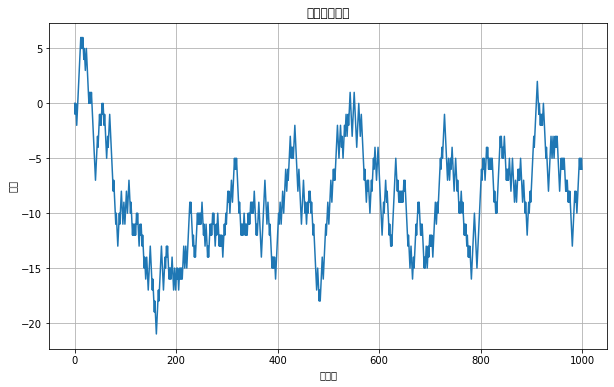

In [8]:
import matplotlib.pyplot as plt
import random

# 参数设置
n_steps = 1000  # 时间步数
delta_t = 1.0   # 每步时间间隔（单位：秒）
delta_x = 1.0   # 每步位移大小

# 初始化位置列表
positions = [0.0]

# 生成布朗运动数据
for _ in range(n_steps):
    # 随机选择向前或向后移动
    step = random.choice([-delta_x, delta_x])
    # 计算新位置
    new_position = positions[-1] + step
    # 添加到位置列表
    positions.append(new_position)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(positions)
plt.title("一维布朗运动")
plt.xlabel("时间步")
plt.ylabel("位置")
plt.grid(True)
plt.show()

# positions  # 输出位置列表


merged_poems是一个list of string，存储着李白的诗歌

我想看看李白的诗歌中出现概率最高的三十个字是什么，请用python为我实现

去除掉标点符号，将结果用条形图可视化

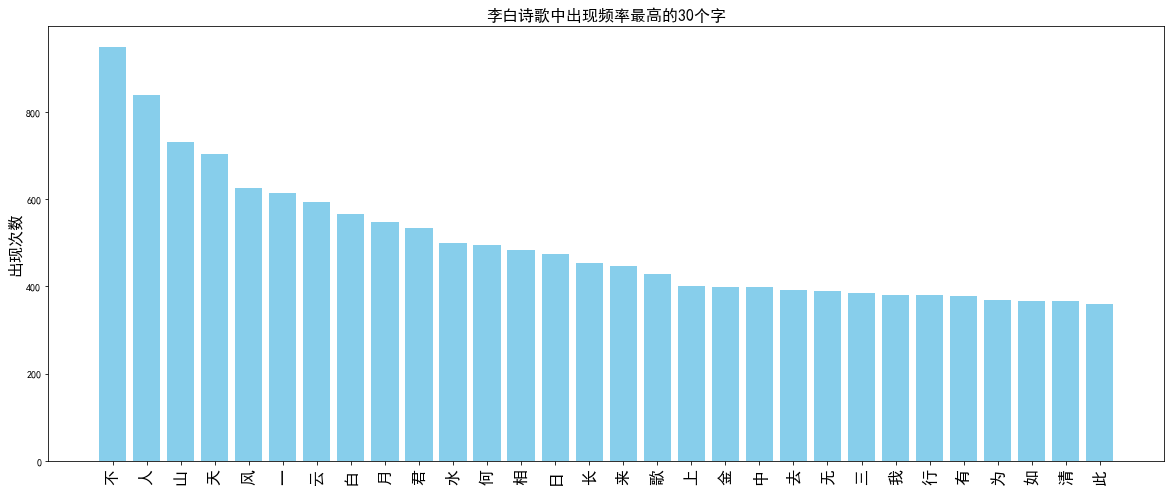

In [14]:
import re
from collections import Counter
import matplotlib.pyplot as plt



# 示例数据，假设merged_poems是以下内容
# merged_poems = [
#     "床前明月光，疑是地上霜。",
#     "举头望明月，低头思故乡。",
#     "飞流直下三千尺，疑是银河落九天。",
#     "两岸猿声啼不住，轻舟已过万重山。"
# ]

# 将所有诗歌合并成一个字符串，并去除标点符号
all_poems = "".join(merged_poems)
all_poems = re.sub(r'[，。: ]', '', all_poems)

# 计算每个字的出现频率
word_counts = Counter(all_poems)

# 获取出现频率最高的30个字
top_30_words = word_counts.most_common(30)

# 准备数据用于绘图
words, counts = zip(*top_30_words)

# 指定支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
# 绘制条形图
plt.figure(figsize=(20, 8))
plt.bar(words, counts, color='skyblue')
plt.ylabel('出现次数',fontsize=16)
plt.title('李白诗歌中出现频率最高的30个字',fontsize=16)
# 设置fontsize为16
plt.xticks(fontsize=16, rotation=90)
# plt.gca().invert_yaxis()  # 反转y轴，使得出现次数最多的字在上方
plt.show()


我希望实现一个Python函数 search_character( character, merged_poems )

其中character是有待搜索的汉字， merged_poems是list of string存储了很多诗歌

我希望搜索character在哪几首诗歌中出现了。

In [16]:
def search_character(character, merged_poems):
    # 存储包含特定字符的诗歌列表
    poems_with_char = []
    
    # 遍历每首诗歌
    for poem in merged_poems:
        # 分割标题和内容
        title, content = poem.split('::')
        # 检查字符是否在诗歌内容中出现
        if character in content:
            poems_with_char.append(title)
    
    return poems_with_char

# 测试函数
search_character('霍', merged_poems)

['君子有所思行',
 '相和歌辞 胡无人行',
 '题嵩山逸人元丹丘山居',
 '杂曲歌辞 君子有所思行',
 '胡无人',
 '塞下曲六首 三',
 '送张遥之寿阳幕府',
 '送杨燕之东鲁']

我希望实现一个Python函数 search_sentence( sentence, merged_poems )

用来查询sentence中的字和那几首古诗中的字的重合度最高

其中sentence是有待搜索的句子， merged_poems是list of string存储了很多诗歌

对于sentence中的每个字 搜索和计数merged_poems中对应字是否出现来累计重合度

把重合度最高的前三首诗歌进行返回

In [17]:
def search_sentence(sentence, merged_poems):
    most_similar_poems = [] # 存储与查询句子重合度最高的诗歌列表
    
    for poem in merged_poems: # 遍历每首诗歌
        # 计算查询句子与诗歌内容的重合度
        similarity = sum(1 for word in sentence if word in poem)
        # 添加到列表中
        most_similar_poems.append((poem, similarity))
    
    # 对列表进行排序，按重合度降序排列
    most_similar_poems.sort(key=lambda x: x[1], reverse=True)
    
    # 返回重合度最高的前三个诗歌
    return [poem for poem, _ in most_similar_poems[:3]]

# 测试函数
search_sentence('清风明月', merged_poems)

['上清宝鼎诗二首 二::人生烛上花，光灭巧妍尽。春风绕树头，日与化工进。只知雨露贪，不闻零落尽。我昔飞骨时，惨见当涂坟。青松霭朝霞，缥缈山丁村。既死明月魄，无复玻璃魂。念此一脱洒，长啸祭昆仑。醉著鸾皇衣，星斗俯可扪。',
 '宣城送刘副使入秦::君即刘越石，雄豪冠当时。凄清横吹曲，慷慨扶风词。虎啸俟腾跃，鸡鸣遭乱离。千金市骏马，万里逐王师。结交楼烦将，侍从羽林儿。统兵捍吴越，豺虎不敢窥。大勋竟莫叙，已过秋风吹。秉钺有季公，凛然负英姿。寄深且戎幕，望重必台司。感激一然诺，纵横两无疑。伏奏归北阙，鸣驺忽西驰。列将咸出祖，英僚惜分离。斗酒满四筵，歌啸宛溪湄。君携东山妓，我咏北门诗。贵贱交不易，恐伤中园葵。昔赠紫骝驹，今倾白玉卮。同欢万斛酒，未足解相思。此别又千里，秦吴渺天涯。月明关山苦，水剧陇头悲。借问几时还，春风入黄池。无令长相忆，折断绿杨枝。',
 '扶风豪士歌::洛阳三月飞胡沙，洛阳城中人怨嗟。天津流水波赤血，白骨相撑如乱麻。我亦东奔向吴国，浮云四塞道路赊。东方日出啼早鸦，城门人开扫落花。梧桐杨柳拂金井，来醉扶风豪士家。扶风豪士天下奇，意气相倾山可移。作人不倚将军势，饮酒岂顾尚书期。雕盘绮食会众客，吴歌赵舞香风吹。原尝春陵六国时，开心写意君所知。堂中各有三千士，明日报恩知是谁。抚长剑，一扬眉，清水白石何离离。脱吾帽，向君笑，饮君酒，为君吟。张良未逐赤松去，桥边黄石知我心。']

- [ ] List, Tuple, Dict，Set
- [ ] 数字和String
- [ ] Excel数据可视化

这节课我们需要稍微讲解一下Python的基础数据结构

如果整个班上的同学都已经学习过对应的内容，也可以跳过这节课的学习

但是如果对于List, Tuple, Dict三者区别还不太清楚的同学，这节课还是要进行学习的

这里有一个关键是，很多时候，我们要向ChatGPT清楚地描述我们一个任务的输入和输出是什么

## 向ChatGPT学习这些数据结构

这里我们还是希望同学们能够“学会如何向ChatGPT学习”，当然这很有可能是一句废话

因为向ChatGPT提问这些基础知识实在是太简单了

```
对于Python的List, Tuple, Dictionary, Set各给出一个程序的例子

并简单描述他们之间的不同以及各自的使用场景
```

<details>
  <summary>ChatGPT的回复</summary>
  
好的，下面是Python中List, Tuple, Dictionary, Set的例子，并附上简单的描述和使用场景：

### List

List 是有序的、可变的集合。它允许重复的元素，可以随时添加、删除或修改元素。常用于需要动态调整内容的场景。

```python
# List example
fruits = ["apple", "banana", "cherry"]
fruits.append("orange")
print(fruits)  # Output: ['apple', 'banana', 'cherry', 'orange']
```

### Tuple

Tuple 是有序的、不可变的集合。一旦创建，无法修改其内容。常用于存储不需要改变的数据，例如多返回值函数的返回值，或作为字典的键。

```python
# Tuple example
coordinates = (10.0, 20.0)
print(coordinates)  # Output: (10.0, 20.0)
```

### Dictionary

Dictionary 是无序的键值对集合。键必须是唯一的且不可变的，值可以是任何类型。常用于需要快速查找的场景，例如配置文件、数据库记录等。

```python
# Dictionary example
student = {"name": "John", "age": 21, "courses": ["Math", "Science"]}
print(student["name"])  # Output: John
```

### Set

Set 是无序的、唯一元素的集合。用于去重和集合运算（交集、并集等）的场景。

```python
# Set example
numbers = {1, 2, 3, 4, 4, 5}
print(numbers)  # Output: {1, 2, 3, 4, 5}
```

### 区别和使用场景

1. **List**: 有序且可变，适合需要动态调整元素的场景，如待办事项列表或需要频繁添加、删除元素的场景。

2. **Tuple**: 有序且不可变，适合存储固定结构的数据，如函数返回的多值、数据库记录等。

3. **Dictionary**: 无序的键值对集合，适合需要快速查找和存储数据关联关系的场景，如学生信息、配置文件等。

4. **Set**: 无序且唯一元素的集合，适合去重和集合运算的场景，如处理独特元素的列表、数学集合运算等。

这些数据结构各有优劣，选择合适的结构可以提高代码的效率和可读性。

</details>

这里简单说明一下要点

## List

List就是数组，或者C++中的vector，或者对于没学过编程的同学来说，就是一个从0开始编号的“数列”

List的好处是他可以线性访问，对于一个list a来说 a[100] 可以直接被访问到，不需要花费额外的时间

没有用的冷知识：当然对于Python来说，List有data type binding的特性，也就是List的每个元素的数据类型可以不一样，这一点和C是不一样的。

不过很多时候，我们还是希望List的每个元素是“一致的”

这样我们在和ChatGPT描述的时候，就可以说

```
{变量名} 是一个List of {数据类型}
```

比如

```
a 是一个List of int

统计a里面最大和最小的数字是几位数，请用python为我实现
```


In [1]:
# 定义一个包含整数的列表
a = [123, 4, 56, 7890, 12345, 678]

# 找到列表中的最大值和最小值
max_num = max(a)
min_num = min(a)

# 计算最大值和最小值的位数
max_num_digits = len(str(abs(max_num)))
min_num_digits = len(str(abs(min_num)))

# 输出结果
print(f"列表中最大数字是 {max_num}，它有 {max_num_digits} 位")
print(f"列表中最小数字是 {min_num}，它有 {min_num_digits} 位")


列表中最大数字是 12345，它有 5 位
列表中最小数字是 4，它有 1 位


## Tuple

Tuple最大的用处在于函数返回

```
为我实现一个函数，输入是一个list of float

输出是这个list的均值和方差
```

In [1]:
def calculate_mean_and_variance(numbers):
    """
    计算列表的均值和方差

    参数:
    numbers (list of float): 输入的浮点数列表

    返回:
    tuple: 包含均值和方差的元组
    """
    if not numbers:
        raise ValueError("列表不能为空")

    # 计算均值
    mean = sum(numbers) / len(numbers)

    # 计算方差
    variance = sum((x - mean) ** 2 for x in numbers) / len(numbers)

    return mean, variance

# 示例使用
numbers = [1.5, 2.3, 3.1, 4.7, 5.6]
mean, variance = calculate_mean_and_variance(numbers)
print("均值:", mean)
print("方差:", variance)


均值: 3.4400000000000004
方差: 2.2863999999999995


这里calculate_mean_and_variance函数的返回就是一个tuple

我们可以试试看下面的代码

In [2]:
result = calculate_mean_and_variance(numbers)
print(result)

(3.4400000000000004, 2.2863999999999995)


这个用括号包裹起来的两个数字，就是一个两个元素的tuple

你还可以用a,b = result 来分别给a,b两个变量赋值

不过tuple是我们比较少主动去使用的一种数据结构，还是在函数返回值的时候被最多见到

## Set

set没什么好说的，是一个无序的list，可以自动去掉里面重合的元素

这个就不多说了

## Dictionary

字典是个非常重要的数据结构。我们先让ChatGPT给一个字典的简单介绍

```
简单介绍Python中的字典数据结构，并给出一个例子
```



<details>
<summary> ChatGPT的输出  </summary>

### Python中的字典数据结构

Python中的字典（Dictionary）是一种内置的数据结构，它以键值对（key-value pair）的形式存储数据。字典具有以下几个特点：

1. **无序**：在Python 3.7之前，字典中的元素是无序的。从Python 3.7开始，字典的插入顺序得到了保证，但这一点并不影响字典的主要特性。
2. **键唯一**：字典中的键必须是唯一的，不能重复。相同的键会覆盖之前的值。
3. **键的类型**：字典的键可以是任何不可变的数据类型，例如字符串、数字和元组。
4. **可变性**：字典是可变的，可以动态地添加、修改和删除键值对。

### 字典的基本操作

以下是一些常见的字典操作：

- **创建字典**：可以使用花括号 `{}` 或 `dict()` 函数创建字典。
- **访问元素**：通过键来访问对应的值。
- **添加/修改元素**：通过键来添加新键值对或修改已有键对应的值。
- **删除元素**：可以使用 `del` 语句或 `pop()` 方法删除指定键值对。

### 字典示例

下面是一个字典的简单示例，展示了创建、访问、添加、修改和删除操作：

```python
# 创建一个字典
student = {
    "name": "Alice",
    "age": 21,
    "major": "Computer Science"
}

# 访问字典中的元素
print(student["name"])  # 输出: Alice
print(student["age"])   # 输出: 21

# 添加一个新键值对
student["gpa"] = 3.8
print(student)  # 输出: {'name': 'Alice', 'age': 21, 'major': 'Computer Science', 'gpa': 3.8}

# 修改已有键的值
student["age"] = 22
print(student)  # 输出: {'name': 'Alice', 'age': 22, 'major': 'Computer Science', 'gpa': 3.8}

# 删除一个键值对
del student["major"]
print(student)  # 输出: {'name': 'Alice', 'age': 22, 'gpa': 3.8}

# 使用 pop() 方法删除键值对并返回值
gpa = student.pop("gpa")
print(gpa)       # 输出: 3.8
print(student)  # 输出: {'name': 'Alice', 'age': 22}
```

通过这些操作，你可以灵活地使用字典来存储和管理数据。在实际应用中，字典常用于存储配置信息、计数、分组数据等场景。

</details>

In [1]:
# 创建一个字典
student = {
    "name": "Alice",
    "age": 21,
    "major": "Computer Science"
}

# 访问字典中的元素
print(student["name"])  # 输出: Alice
print(student["age"])   # 输出: 21

# 添加一个新键值对
student["gpa"] = 3.8
print(student)  # 输出: {'name': 'Alice', 'age': 21, 'major': 'Computer Science', 'gpa': 3.8}

# 修改已有键的值
student["age"] = 22
print(student)  # 输出: {'name': 'Alice', 'age': 22, 'major': 'Computer Science', 'gpa': 3.8}

# 删除一个键值对
del student["major"]
print(student)  # 输出: {'name': 'Alice', 'age': 22, 'gpa': 3.8}

# 使用 pop() 方法删除键值对并返回值
gpa = student.pop("gpa")
print(gpa)       # 输出: 3.8
print(student)  # 输出: {'name': 'Alice', 'age': 22}


Alice
21
{'name': 'Alice', 'age': 21, 'major': 'Computer Science', 'gpa': 3.8}
{'name': 'Alice', 'age': 22, 'major': 'Computer Science', 'gpa': 3.8}
{'name': 'Alice', 'age': 22, 'gpa': 3.8}
3.8
{'name': 'Alice', 'age': 22}


字典关键是可以有很多"字段"，这使得程序的可读性会上升很多

因为你在List和Tuple中，都没办法用一个变量来表示一个字段，比如name，age，major，gpa这些字段

但是在Dictionary结构里面，是可以的

另外我们会发现，越来越多的大模型的api，也使用Dictionary的形式来作为输入和输出

比如我们以智谱大模型的为例子

```python
	from zhipuai import ZhipuAI
client = ZhipuAI(api_key="") # 填写您自己的APIKey
response = client.chat.completions.create(
    model="glm-4",  # 填写需要调用的模型名称
    messages=[
        {"role": "user", "content": "作为一名营销专家，请为智谱开放平台创作一个吸引人的slogan"},
        {"role": "assistant", "content": "当然，为了创作一个吸引人的slogan，请告诉我一些关于您产品的信息"},
        {"role": "user", "content": "智谱AI开放平台"},
        {"role": "assistant", "content": "智启未来，谱绘无限一智谱AI，让创新触手可及!"},
        {"role": "user", "content": "创造一个更精准、吸引人的slogan"}
    ],
)
print(response.choices[0].message)
```

他是这么调用的。这里messages就是一个list of dictionary

另外，response的返回，实际上也是一个dictionary

```json
{
  "created": 1703487403,
  "id": "8239375684858666781",
  "model": "glm-4",
  "request_id": "8239375684858666781",
  "choices": [
      {
          "finish_reason": "stop",
          "index": 0,
          "message": {
              "content": "智绘蓝图，AI驱动 —— 智谱AI，让每一刻创新成为可能。",
              "role": "assistant"
          }
      }
  ],
  "usage": {
      "completion_tokens": 217,
      "prompt_tokens": 31,
      "total_tokens": 248
  }
}
```

这种数据结构被称为json数据结构

## Python的Dictionary和json数据结构有什么联系和不同？

```
Python的Dictionary和json数据结构有什么联系和不同？
```

<details>
<summary> ChatGPT的输出 </summary>

### Python的Dictionary和JSON数据结构的联系和不同

#### 联系

1. **结构相似**：
   - **键值对**：两者都是以键值对的形式存储数据。
   - **嵌套**：两者都支持嵌套结构，即值可以是另一个字典或JSON对象。

2. **数据类型**：
   - **字典**：Python的字典可以存储任意数据类型的值，包括其他字典、列表、元组、字符串、数字等。
   - **JSON**：JSON支持的基本数据类型包括字符串、数字、布尔值、数组（对应Python的列表）、对象（对应Python的字典）和null（对应Python的None）。

3. **互相转换**：
   - Python标准库提供了`json`模块，可以方便地将Python字典和JSON字符串进行互相转换。
     - 使用`json.dumps()`将Python字典转换为JSON字符串。
     - 使用`json.loads()`将JSON字符串转换为Python字典。

#### 不同

1. **语法差异**：
   - **Python字典**：使用单引号或双引号表示字符串，键名不需要引号（如果键是字符串，则可以使用引号）。
     ```python
     student = {
         "name": "Alice",
         'age': 21,
         "major": "Computer Science"
     }
     ```
   - **JSON**：使用双引号表示字符串，键名必须使用双引号。
     ```json
     {
         "name": "Alice",
         "age": 21,
         "major": "Computer Science"
     }
     ```

2. **数据类型支持**：
   - **Python字典**：支持更多的数据类型，如元组、集合、函数等。
   - **JSON**：仅支持基本数据类型，如字符串、数字、布尔值、数组、对象和null。

3. **用途**：
   - **Python字典**：主要用于Python程序内部的数据存储和操作。
   - **JSON**：主要用于数据交换格式，特别是在Web应用中用于客户端和服务器之间传递数据。

#### 例子

**Python字典转换为JSON字符串**

```python
import json

# Python字典
student_dict = {
    "name": "Alice",
    "age": 21,
    "major": "Computer Science"
}

# 将字典转换为JSON字符串
student_json = json.dumps(student_dict)
print(student_json)  # 输出: {"name": "Alice", "age": 21, "major": "Computer Science"}
```

**JSON字符串转换为Python字典**

```python
import json

# JSON字符串
student_json = '{"name": "Alice", "age": 21, "major": "Computer Science"}'

# 将JSON字符串转换为Python字典
student_dict = json.loads(student_json)
print(student_dict)  # 输出: {'name': 'Alice', 'age': 21, 'major': 'Computer Science'}
```

通过这些例子可以看出，Python的字典和JSON数据结构虽然有一些差异，但它们之间可以通过标准库的`json`模块进行方便的互相转换，从而实现数据在不同系统和平台之间的传递和使用。

</details>

简单来说，json是一个字符串类型地格式，和Python的dictionary可以有很良好的（一句代码就能实现的）转换

因为类似ChatGPT的大语言模型天然对json数据格式有很好的输入输出。

我们建议同学们更多地去掌握json数据结构，以及对应的在Python中使用字典作为主要的数据传输结构

## 对Excel数据进行可视化

在data/名单.xls 我们放置了一个excel文件

是我在网上随便找的某年某省信息学奥赛入围名单

让我们来做一个简单的任务，我们看看哪个学校入围的学生最多呢？

```
data/名单.xlsx

第一行是各列的标题行

请帮我实现一段代码，用pandas读取这个表格（所有列都进行读取）

并统计各个学校入围的人数
```


In [9]:
import pandas as pd

# 读取 Excel 文件
file_path = 'data/名单.xlsx'
df = pd.read_excel(file_path)

# 显示读取的表格内容（可选）
print(df.head())

# 统计各个学校入围的人数
school_counts = df['学校'].value_counts()

# 显示统计结果
print(school_counts)


   编号 姓  名   性别  年级   组别    初赛   学    校     辅导老师      语言
0   1  陈濠华  NaN  高一   提高  21.0     新余一中      郑剑英  PASCAL
1   2  陈嘉胜    男  高二  提高组  48.0  九江市第一中学     龚  禹  PASCAL
2   3  陈凌翔    男  高三   提高  71.0  江西省赣州中学      周亿生  PASCAL
3   4  陈斋弈    男  高三   提高  54.5  安远县第一中学  唐信群、唐金英  PASCAL
4   5  奉琳竣    男  高二   提高   NaN     萍乡中学      文洲萍  PASCAL


KeyError: '学校'

这里我们发现居然报错了，找不到 学校这个列

这是为什么呢，实际上这个列被打成了 “学    校”

那么我们可以继续让ChatGPT帮忙修改代码


```
我发现表格里的列名被误写成了 “学    校”

为我修改代码，在读取表格的时候，去掉所有列名里面的空格
```

In [11]:
import pandas as pd

# 读取 Excel 文件并去除列名中的空格
file_path = 'data/名单.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.replace(' ', '')

# 显示读取的表格内容（可选）
print(df.head())

# 统计各个学校入围的人数
school_counts = df['学校'].value_counts()

# 显示统计结果
print(school_counts)


   编号   姓名   性别  年级   组别    初赛       学校     辅导老师      语言
0   1  陈濠华  NaN  高一   提高  21.0     新余一中      郑剑英  PASCAL
1   2  陈嘉胜    男  高二  提高组  48.0  九江市第一中学     龚  禹  PASCAL
2   3  陈凌翔    男  高三   提高  71.0  江西省赣州中学      周亿生  PASCAL
3   4  陈斋弈    男  高三   提高  54.5  安远县第一中学  唐信群、唐金英  PASCAL
4   5  奉琳竣    男  高二   提高   NaN     萍乡中学      文洲萍  PASCAL
学校
萍乡中学       15
江西省赣州中学    13
上饶中学       10
赣州三中        8
新余一中        7
芦溪中学        6
九江市同文中学     5
安远县第一中学     5
江西省高安中学     5
新余三中        5
九江外国语学校     3
九江市第一中学     3
新钢中学        3
九江晨光中学      2
新余四中        2
赣州市第一中学     2
婺源县紫阳中学     2
会昌中学        2
一中魁星阁校区     1
莲花中学        1
江西省大余中学     1
Name: count, dtype: int64


当然我们还可以进一步可视化

```
可以进一步帮我给出

对人数前20多的学校的进行可视化条形图的代码吗？
```

C:\Users\XPS\AppData\Local\Temp/ipykernel_25088/2883547071.py:12: UserWarning: Glyph 33805 (\N{CJK UNIFIED IDEOGRAPH-840D}) missing from current font.
  plt.tight_layout()
C:\Users\XPS\AppData\Local\Temp/ipykernel_25088/2883547071.py:12: UserWarning: Glyph 20065 (\N{CJK UNIFIED IDEOGRAPH-4E61}) missing from current font.
  plt.tight_layout()
C:\Users\XPS\AppData\Local\Temp/ipykernel_25088/2883547071.py:12: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
C:\Users\XPS\AppData\Local\Temp/ipykernel_25088/2883547071.py:12: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  plt.tight_layout()
C:\Users\XPS\AppData\Local\Temp/ipykernel_25088/2883547071.py:12: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from current font.
  plt.tight_layout()
C:\Users\XPS\AppData\Local\Temp/ipykernel_25088/2883547071.py:12: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from cur

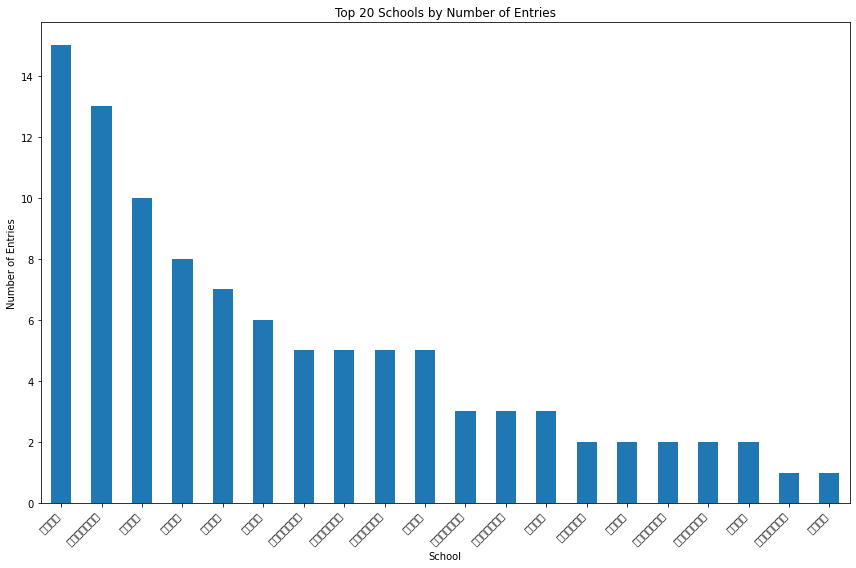

In [13]:
import matplotlib.pyplot as plt
# 取人数前20多的学校
top_20_schools = school_counts.head(20)

# 创建条形图
plt.figure(figsize=(12, 8))
top_20_schools.plot(kind='bar')
plt.title('Top 20 Schools by Number of Entries')
plt.xlabel('School')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 显示图表
plt.show()

中文字都不见了？？

直接问ChatGPT

```
plt不能显示中文有办法解决吗
```


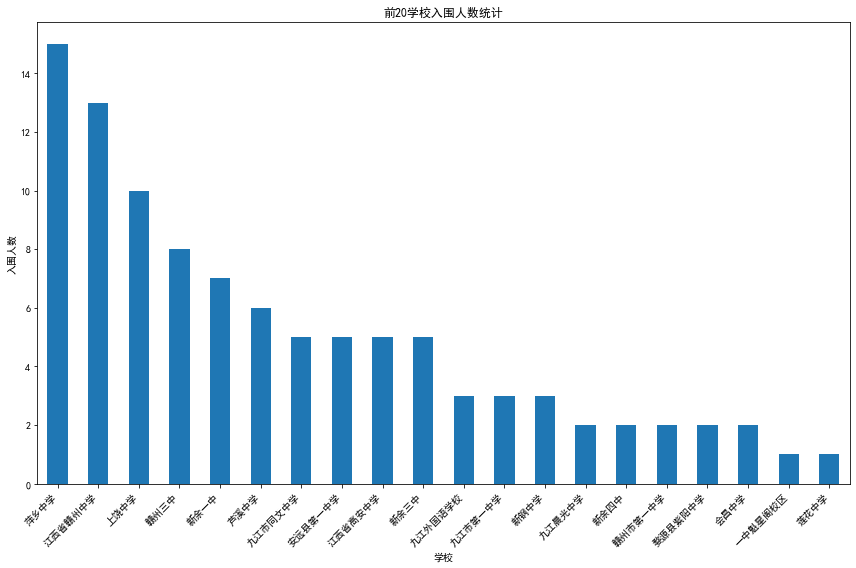

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



# 取人数前20多的学校
top_20_schools = school_counts.head(20)

# 设置中文字体
# 这里使用 SimHei 字体，可以根据自己的系统安装情况选择合适的字体
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 创建条形图
plt.figure(figsize=(12, 8))
top_20_schools.plot(kind='bar')
plt.title('前20学校入围人数统计')
plt.xlabel('学校')
plt.ylabel('入围人数')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 显示图表

当然我们可以逐行对表格的信息进行打印，使用下面的代码

In [21]:
import pandas as pd

# 读取 Excel 文件并去除列名中的空格
file_path = 'data/名单.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.replace(' ', '')

count = 0

# 逐行打印表格中的信息
for index, row in df.iterrows():
    name = row["姓名"]
    print(f"姓名 {name} , 行 {index + 1}: {row.to_dict()}")
    count += 1
    if count >= 10:  # 打印前10行
        break


姓名 陈濠华 , 行 1: {'编号': 1, '姓名': '陈濠华', '性别': nan, '年级': '高一', '组别': '提高', '初赛': 21.0, '学校': '新余一中', '辅导老师': '郑剑英', '语言': 'PASCAL'}
姓名 陈嘉胜 , 行 2: {'编号': 2, '姓名': '陈嘉胜', '性别': '男', '年级': '高二', '组别': '提高组', '初赛': 48.0, '学校': '九江市第一中学', '辅导老师': '龚  禹', '语言': 'PASCAL'}
姓名 陈凌翔 , 行 3: {'编号': 3, '姓名': '陈凌翔', '性别': '男', '年级': '高三', '组别': '提高', '初赛': 71.0, '学校': '江西省赣州中学', '辅导老师': '周亿生', '语言': 'PASCAL'}
姓名 陈斋弈 , 行 4: {'编号': 4, '姓名': '陈斋弈', '性别': '男', '年级': '高三', '组别': '提高', '初赛': 54.5, '学校': '安远县第一中学', '辅导老师': '唐信群、唐金英', '语言': 'PASCAL'}
姓名 奉琳竣 , 行 5: {'编号': 5, '姓名': '奉琳竣', '性别': '男', '年级': '高二', '组别': '提高', '初赛': nan, '学校': '萍乡中学', '辅导老师': '文洲萍', '语言': 'PASCAL'}
姓名 顾培炎 , 行 6: {'编号': 6, '姓名': '顾培炎', '性别': '男', '年级': '初二', '组别': '提高组', '初赛': 70.0, '学校': '九江晨光中学', '辅导老师': '龚  禹', '语言': 'PASCAL'}
姓名 黄佃宽 , 行 7: {'编号': 7, '姓名': '黄佃宽', '性别': '男', '年级': '高三', '组别': '提高', '初赛': nan, '学校': '萍乡中学', '辅导老师': '文洲萍', '语言': 'PASCAL'}
姓名 何浩玮 , 行 8: {'编号': 8, '姓名': '何浩玮', '性别': '男', '年级': '高一', '组别': '提高组', '初赛': 7

这里可以看到，pandas中的每个row，就好像一个字典一样，可以直接通过row[{key_name}]的方式进行访问

当然这里的row并不是完全等价于一个dict（而是有更多的功能设计），把.to_dict() 去掉，直接打印row，看看有什么不同

# 总结

这节课是一个过渡课程，因为我们之后想进一步用ChatGPT帮助我们写出更复杂的程序，有一大重要的前提是我们可以向ChatGPT描述清楚输入和输出的数据结构。所以这个时候，去而学习字典、列表、元组、集合等数据结构，就显得尤为重要了。

同时作为实践，我们还尝试了一下对Excel数据进行可视化。你也可以找到更多其他数据，来做出更复杂的可视化来试试看。

在data/李白.txt存储了形如

```
鼓吹曲辞 上之回::李白::三十六离宫，楼台与天通。阁道步行月，美人愁烟空。恩疏宠不及，桃李伤春风。淫乐意何极，金舆向回中。万乘出黄道，千旗扬彩虹。前军细柳北，后骑甘泉东。岂问渭川老，宁邀襄野童。秋暮瑶池宴，归来乐未穷。
鼓吹曲辞 战城南::李白::去年战桑干源，今年战葱河道。洗兵条支海上波，放马天山雪中草。万里长征战，三军尽衰老。匈奴以杀戮为耕作，古来唯见白骨黄沙田。秦家筑城备胡处，汉家还有烽火然。烽火然不息，征战无已时。野战格鬬死，败马号鸣向天悲。乌鸢啄人肠，衔飞上挂枯树枝。士卒涂草莽，将军空尔为。乃知兵者是凶器，圣人不得已而用之。
```

读取解析这个txt后，建立一个set

把每个诗歌的内容去除掉标点符号后的str_no_punc，做一下去重

然后把不重复的部分生成一个两列的data/李白.csv ，第一列是诗名，第二列是诗的内容，请帮我写一个python代码实现



In [9]:
import re
import pandas as pd

# Function to remove punctuation from a given string
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Function to process the file
def process_poetry_file(file_path, output_path):
    poems = set()
    exsisted = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split by "::" to get the poem title and content
            parts = line.split("::")
            if len(parts) == 3:
                title = parts[0].strip()
                content = parts[2].strip()
                content = content.replace("。。", "。")
                
                # Remove punctuation from the poem content
                content_no_punc = remove_punctuation(content)

                if content_no_punc not in exsisted:
                    # Add the poem to the set
                    exsisted.add(content_no_punc)
                else:
                    continue
                
                # Add to the set to ensure uniqueness
                poems.add((title, content))
    
    # Create a DataFrame from the set
    df = pd.DataFrame(list(poems), columns=['Title', 'Content'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_path, index=False, encoding='utf-8')

# File paths
input_file_path = 'data/李白.txt'
output_file_path = 'data/李白.csv'

# Process the file and generate the CSV
process_poetry_file(input_file_path, output_file_path)


data/李白.csv 存储了李白的诗词

```
Poem Name,Poem Content
小桃源,黟县小桃源，烟霞百里间。地多灵草木，人尚古衣冠。市向晡前散，山经夜后寒。
乌牙寺,夜宿乌牙寺，举手扪星辰。不取高声语，恐惊天上人。
```

我希望统计李白诗歌中出现最多的30个字

In [2]:
import csv

# 初始化一个空列表来存储合并后的数据
merged_poems = []

# 读取CSV文件
with open('data/李白.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # 合并标题和内容
        merged_str = f"{row['Title']}::{row['Content']}"
        # 将合并后的字符串添加到列表中
        merged_poems.append(merged_str)

merged_poems是一个list of string，存储着李白的诗歌

我想看看李白的诗歌中出现概率最高的三十个字是什么，请用python为我实现

In [5]:
from collections import Counter

# 合并所有诗歌内容为一个长字符串
all_poems_content = ' '.join(poem.split('::')[1] for poem in merged_poems)

# 使用Counter统计每个字出现的次数
word_counts = Counter(all_poems_content.replace(' ', ''))  # 移除空格

# 获取出现次数最多的30个字
top_30_words = word_counts.most_common(30)

for word, count in top_30_words:
    print(f"{word}: {count}", end = ";")

，: 7915;。: 7758;不: 939;人: 771;天: 692;山: 590;云: 585;风: 559;白: 522;月: 519;君: 513;何: 492;一: 491;水: 481;日: 444;来: 444;相: 427;长: 421;去: 387;无: 383;我: 381;如: 365;为: 364;金: 360;有: 351;此: 350;上: 339;清: 339;中: 331;时: 329;

In [7]:
def search_character(character, merged_poems):
    # 存储包含特定字符的诗歌列表
    poems_with_char = []
    
    # 遍历每首诗歌
    for poem in merged_poems:
        # 分割标题和内容
        title, content = poem.split('::')
        # 检查字符是否在诗歌内容中出现
        if character in content:
            poems_with_char.append(title)
    
    return poems_with_char

# 测试函数
search_character('间', merged_poems)

['游泰山六首 二',
 '姑孰十咏 丹阳湖',
 '寻高凤石门山中元丹丘',
 '翰林读书言怀呈集贤诸学士',
 '相和歌辞 胡无人行',
 '蜀道难',
 '桂殿秋 二',
 '送岑征君归鸣皋山',
 '驾去温泉后赠杨山人',
 '独坐敬亭山',
 '相和歌辞 白头吟二首 一',
 '与夏十二登岳阳楼',
 '送范山人归泰山',
 '陪族叔刑部侍郎晔及中书贾舍人至游洞庭五首 五',
 '同族侄评事黯游昌禅师山池二首 一',
 '独酌',
 '胡无人',
 '以诗代书荅元丹丘',
 '横吹曲辞 关山月',
 '赠从弟宣州长史昭',
 '酬张司马赠墨',
 '白头吟',
 '闺情',
 '登敬亭北二小山余时送客逢崔侍御并登此地',
 '梁园吟',
 '杂歌谣辞 箜篌谣',
 '远别离',
 '相和歌辞 上云乐',
 '赠卢司户',
 '庐山谣寄卢侍御虚舟',
 '草创大还赠柳官迪',
 '相和歌辞 蜀道难',
 '广陵赠别',
 '经乱离后天恩流夜郎忆旧游书怀赠江夏韦太守良宰',
 '游泰山六首 六',
 '下途归石门旧居',
 '南都行',
 '日夕山中忽然有怀',
 '留别金陵诸公',
 '登峨眉山',
 '金陵江上遇蓬池隐者',
 '杂曲歌辞 远别离',
 '赠黄山胡公求白鹇',
 '飞龙引二首 二',
 '在水军宴赠幕府诸侍御',
 '相和歌辞 公无渡河',
 '琴曲歌辞 飞龙引二首 二',
 '赠裴司马',
 '早发白帝城',
 '登太白峰',
 '豫章行',
 '送族弟凝至晏堌',
 '杂诗',
 '留别西河刘少府',
 '与南陵常赞府游五松山',
 '杂曲歌辞 宫中行乐词 四',
 '商山四皓',
 '相和歌辞  豫章行',
 '箜篌谣',
 '宣州九日闻崔四侍御与宇文太守游敬亭余时登响山不同此赏醉后寄崔侍御二首 一',
 '望庐山瀑布水二首 一',
 '赠何七判官昌浩',
 '读诸葛武侯传书怀赠长安崔少府叔封昆季',
 '侍从宜春苑奉诏赋龙池柳色初青听新莺百啭歌',
 '杂曲歌辞 鸣雁行',
 '醉后赠从甥高镇',
 '相和歌辞 门有车马客行',
 '邺中赠王大',
 '游泰山六首 三',
 '寄弄月溪吴山人',
 '叙旧赠江阳宰陆调',
 '赠宣城宇文太守兼呈崔侍御',
 '春日独酌二首 二',
 '宫中行乐词八首 四',
 '从军行',
 '送张

我希望实现一个Python函数 search_sentence( sentence, merged_poems )

用来查询sentence中的字和那几首古诗中的字的重合度最高

其中sentence是有待搜索的句子， merged_poems是list of string存储了很多诗歌

对于sentence中的每个字 搜索和计数merged_poems中对应字是否出现来累计重合度

把重合度最高的前三首诗歌进行返回

In [8]:
def search_sentence(sentence, merged_poems):
    most_similar_poems = [] # 存储与查询句子重合度最高的诗歌列表
    
    for poem in merged_poems: # 遍历每首诗歌
        # 计算查询句子与诗歌内容的重合度
        similarity = sum(1 for word in sentence if word in poem)
        # 添加到列表中
        most_similar_poems.append((poem, similarity))
    
    # 对列表进行排序，按重合度降序排列
    most_similar_poems.sort(key=lambda x: x[1], reverse=True)
    
    # 返回重合度最高的前三个诗歌
    return [poem for poem, _ in most_similar_poems[:3]]

# 测试函数
search_sentence('清风明月', merged_poems)

['上清宝鼎诗二首 二::人生烛上花，光灭巧妍尽。春风绕树头，日与化工进。只知雨露贪，不闻零落尽。我昔飞骨时，惨见当涂坟。青松霭朝霞，缥缈山丁村。既死明月魄，无复玻璃魂。念此一脱洒，长啸祭昆仑。醉著鸾皇衣，星斗俯可扪。',
 '宣城送刘副使入秦::君即刘越石，雄豪冠当时。凄清横吹曲，慷慨扶风词。虎啸俟腾跃，鸡鸣遭乱离。千金市骏马，万里逐王师。结交楼烦将，侍从羽林儿。统兵捍吴越，豺虎不敢窥。大勋竟莫叙，已过秋风吹。秉钺有季公，凛然负英姿。寄深且戎幕，望重必台司。感激一然诺，纵横两无疑。伏奏归北阙，鸣驺忽西驰。列将咸出祖，英僚惜分离。斗酒满四筵，歌啸宛溪湄。君携东山妓，我咏北门诗。贵贱交不易，恐伤中园葵。昔赠紫骝驹，今倾白玉卮。同欢万斛酒，未足解相思。此别又千里，秦吴渺天涯。月明关山苦，水剧陇头悲。借问几时还，春风入黄池。无令长相忆，折断绿杨枝。',
 '扶风豪士歌::洛阳三月飞胡沙，洛阳城中人怨嗟。天津流水波赤血，白骨相撑如乱麻。我亦东奔向吴国，浮云四塞道路赊。东方日出啼早鸦，城门人开扫落花。梧桐杨柳拂金井，来醉扶风豪士家。扶风豪士天下奇，意气相倾山可移。作人不倚将军势，饮酒岂顾尚书期。雕盘绮食会众客，吴歌赵舞香风吹。原尝春陵六国时，开心写意君所知。堂中各有三千士，明日报恩知是谁。抚长剑，一扬眉，清水白石何离离。脱吾帽，向君笑，饮君酒，为君吟。张良未逐赤松去，桥边黄石知我心。']

我已经实现了search_sentence(sentence, merged_poems ) ，
会根据 sentence，搜索至多三句最接近sentence的李白的诗词，以list of string的形式进行输出

我希望实现一个sentence2prompt( sentence, merged_poems )函数，

根据输入的sentence，返回一个字符串

"""
你扮演唐朝著名诗人李白

参考李白的诗词:
{诗歌一}
{诗歌二}
{诗歌三}

请模仿李白的口吻和经历与我进行对话
"""

In [10]:
def sentence2prompt(sentence, merged_poems):
    # 使用search_sentence函数找到最接近的诗词
    similar_poems = search_sentence(sentence, merged_poems)
    
    # 初始化prompt字符串
    prompt = "你扮演唐朝著名诗人李白\n\n参考李白的诗词:\n"
    
    # 将找到的诗词添加到prompt中
    for poem in similar_poems:
        prompt += f"{poem}\n"
    
    # 添加最后的对话指示
    prompt += "\n请模仿李白的口吻和经历与我进行对话"
    
    return prompt

print(sentence2prompt('今天明月当空，请李白兄与在下共饮', merged_poems))

你扮演唐朝著名诗人李白

参考李白的诗词:
经乱离后天恩流夜郎忆旧游书怀赠江夏韦太守良宰::天上白玉京，十二楼五城。仙人抚我顶，结发受长生。误逐世间乐，颇穷理乱情。九十六圣君，浮云挂空名。天地赌一掷，未能望战争。试涉霸王略，将期轩冕荣。时命乃大谬，弃之海上行。学剑翻自哂，为文竟何成。剑非万人敌，文窃四海声。儿戏不足道，五噫出西京。临当欲去时，慷慨泪沾缨。叹君倜傥才，标举冠群英。开筵引祖帐，慰此远徂征。鞍马若浮云，送余骠骑亭。歌锺不尽意，白日落昆明。十月到幽州，戈鋋若罗星。君王弃北海，扫地借长鲸。呼吸走百川，燕然可摧倾。心知不得语，却欲栖蓬瀛。弯弧惧天狼，挟矢不敢张。揽涕黄金台，呼天哭昭王。无人贵骏骨，𫘧耳空腾骧。乐毅傥再生，于今亦奔亡。蹉跎不得意，驱马还贵乡。逢君听弦歌，肃穆坐华堂。百里独太古，陶然卧羲皇。征乐昌乐馆，开筵列壶觞。贤豪间青娥，对烛俨成行。醉舞纷绮席，清歌绕飞梁。欢娱未终朝，秩满归咸阳。祖道拥万人，供帐遥相望。一别隔千里，荣枯异炎凉。炎凉几度改，九土中横溃。汉甲连胡兵，沙尘暗云海。草木摇杀气，星辰无光彩。白骨成丘山，苍生竟何罪。函关壮帝居，国命悬哥舒。长戟三十万，开门纳凶渠。公卿如犬羊，忠谠醢与葅。二圣出游豫，两京遂丘墟。帝子许专征，秉旄控强楚。节制非桓文，军师拥熊虎。人心失去就，贼势腾风雨。惟君固房陵，诚节冠终古。仆卧香炉顶，餐霞漱瑶泉。门开九江转，枕下五湖连。半夜水军来，浔阳满旌旃。空名适自误，迫胁上楼船。徒赐五百金，弃之若浮烟。辞官不受赏，翻谪夜郎天。夜郎万里道，西上令人老。扫荡六合清，仍为负霜草。日月无偏照，何由诉苍昊。良牧称神明，深仁恤交道。一忝青云客，三登黄鹤楼。顾惭祢处士，虚对鹦鹉洲。樊山霸气尽，寥落天地秋。江带峨眉雪，川横三峡流。万舸此中来，连帆过扬州。送此万里目，旷然散我愁。纱窗倚天开，水树绿如发。窥日畏衔山，促酒喜得月。吴娃与越艳，窈窕夸铅红。呼来上云梯，含笑出帘栊。对客小垂手，罗衣舞春风。宾跪请休息，主人情未极。览君荆山作，江鲍堪动色。清水出芙蓉，天然去雕饰。逸兴横素襟，无时不招寻。朱门拥虎士，列戟何森森。剪凿竹石开，萦流涨清深。登台坐水阁，吐论多英音。片辞贵白壁，一诺轻黄金。谓我不愧君，青鸟明丹心。五色云间鹊，飞鸣天上来。传闻赦书至，却放夜郎回。暖气变寒谷，炎烟生死灰。君登凤池去，忽弃贾生才。桀犬尚吠尧，匈奴笑千秋。中夜四五叹，

In [12]:
from zhipuai import ZhipuAI
import gradio as gr
import csv

# sentence2prompt函数
def sentence2prompt(sentence, merged_poems):
    similar_poems = search_sentence(sentence, merged_poems)
    prompt = "你扮演唐朝著名诗人李白\n\n参考李白的诗词:\n"
    for poem in similar_poems:
        prompt += f"{poem}\n"
    prompt += "\n请模仿李白的口吻和经历与我进行对话"
    return prompt

# search_sentence函数
def search_sentence(sentence, merged_poems):
    most_similar_poems = []
    for poem in merged_poems:
        similarity = sum(1 for word in sentence if word in poem)
        most_similar_poems.append((poem, similarity))
    most_similar_poems.sort(key=lambda x: x[1], reverse=True)
    return [poem for poem, _ in most_similar_poems[:3]]

# 读取merged_poems
merged_poems = []
with open('data/李白.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        merged_str = f"{row['Title']}::{row['Content']}"
        merged_poems.append(merged_str)

# get_api_key函数
def get_api_key(file_path):
    with open(file_path, 'r') as file:
        return file.read().strip()

# question2response函数
def question2response(user_input, zhipu_api_key, merged_poems):
    client = ZhipuAI(api_key=zhipu_api_key)
    system_prompt = sentence2prompt(user_input, merged_poems)
    response = client.chat.completions.create(
        model="glm-4-flash",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input}
        ],
    )
    return response.choices[0].message.content

with gr.Blocks() as demo:
    zhipu_api_key = get_api_key("data/zhipu_apikey.txt")
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.ClearButton([msg, chatbot])

    def respond(message, chat_history):
        bot_message = question2response(message, zhipu_api_key, merged_poems)
        chat_history.append((message, bot_message))
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])

if __name__ == "__main__":
    demo.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [1]:
from zhipuai import ZhipuAI
import gradio as gr
import csv

rag_result = ""

# sentence2prompt函数
def sentence2prompt(sentence, merged_poems):
    similar_poems = search_sentence(sentence, merged_poems)
    prompt = "你扮演唐朝著名诗人李白\n\n参考李白的诗词:\n"
    for poem in similar_poems:
        prompt += f"{poem}\n"

    global rag_result
    rag_result = ""
    for poem in similar_poems:
        rag_result += poem.replace("::","\n") + "\n"
        
    prompt += "\n请模仿李白的口吻和经历与我进行对话"
    return prompt

# search_sentence函数
def search_sentence(sentence, merged_poems):
    most_similar_poems = []
    for poem in merged_poems:
        similarity = sum(1 for word in sentence if word in poem)
        most_similar_poems.append((poem, similarity))
    most_similar_poems.sort(key=lambda x: x[1], reverse=True)
    return [poem for poem, _ in most_similar_poems[:3]]

# 读取merged_poems
merged_poems = []
with open('data/李白.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        merged_str = f"{row['Title']}::{row['Content']}"
        merged_poems.append(merged_str)

# get_api_key函数
def get_api_key(file_path):
    with open(file_path, 'r') as file:
        return file.read().strip()

# question2response函数
def question2response(user_input, zhipu_api_key, merged_poems, chat_history, use_rag_radio):
    client = ZhipuAI(api_key=zhipu_api_key)
    if use_rag_radio and use_rag_radio == "使用RAG":
        system_prompt = sentence2prompt(user_input, merged_poems)
    else:
        system_prompt = "你扮演唐朝著名诗人李白，请模仿李白的口吻和经历与我进行对话"
        global rag_result
        rag_result = ""

    messages = [
            {"role": "system", "content": system_prompt},
    ]
    if chat_history:
        for user_msg, bot_msg in chat_history[-2:]:
            if user_msg:
                messages.append({"role": "user", "content": user_msg})
            if bot_msg:
                messages.append({"role": "assistant", "content": bot_msg})

    messages.append({"role": "user", "content": user_input})

    response = client.chat.completions.create(
        model="glm-4-flash",
        messages=messages,
    )
    return response.choices[0].message.content

with gr.Blocks() as demo:
    zhipu_api_key = get_api_key("data/zhipu_apikey.txt")
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.ClearButton([msg, chatbot])
    use_rag_radio = gr.Radio(choices=["使用RAG", "不使用RAG"], value="使用RAG", label="选择模式")
    rag_search_result = gr.TextArea(label="RAG搜索结果")

    def respond(message, chat_history, use_rag_radio):
        bot_message = question2response(message, zhipu_api_key, merged_poems, chat_history, use_rag_radio)
        chat_history.append((message, bot_message))
        return "", chat_history
    
    def update_rag_result():
        return rag_result

    msg.submit(respond, [msg, chatbot, use_rag_radio], [msg, chatbot]).then(update_rag_result,[], [rag_search_result])

if __name__ == "__main__":
    demo.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
